In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
# Display the first few rows of the dataset
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Drop unnecessary columns from the DataFrame
column_to_remove = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
df = df.drop(column_to_remove, axis=1)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df.shape

(5572, 2)

In [7]:
df.info

<bound method DataFrame.info of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [9]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df[df.duplicated()]


,v1,v2
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [11]:
df = df.drop_duplicates()
print(df)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5169 rows x 2 columns]


In [12]:
df["v1"].value_counts()

v1
ham     4516
spam     653
Name: count, dtype: int64

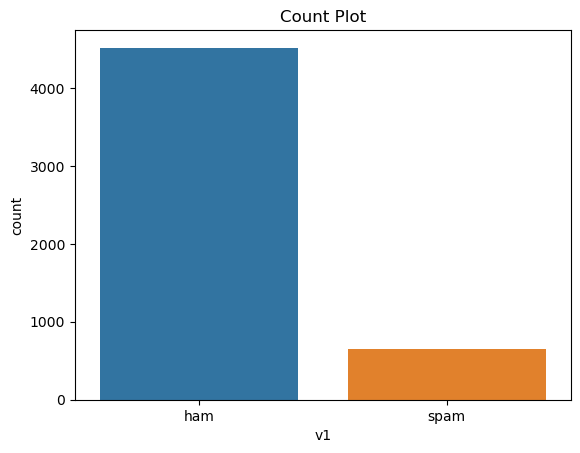

In [13]:
sns.countplot(data=df, x='v1')
plt.xlabel('v1')
plt.ylabel('count')
plt.title('Count Plot')
plt.show()

In [14]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")

df.loc[df["v1"] == "spam", "Category"] = 0
df.loc[df["v1"] == "ham", "Category"] = 1
df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_9828\865858291.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df["v1"] == "spam", "Category"] = 0


,v1,v2,Category
0,ham,"Go until jurong point, crazy.. Available only ...",1.0
1,ham,Ok lar... Joking wif u oni...,1.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,ham,U dun say so early hor... U c already then say...,1.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1.0


In [15]:
# Separate the feature (v2) and target (category) data
X=df['v2']
y=df['Category']

In [16]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [18]:
y

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: Category, Length: 5169, dtype: float64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [20]:
#Create a TF-IDF vectorizer to convert text messages into numerical feature
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [21]:
#Model Training
model = LogisticRegression()
model.fit(X_train_features,y_train)

LogisticRegression()

In [22]:
# Model evaluation
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

# Print accuracy
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))

Accuracy on training data: 96.20314389359129 %
Accuracy on test data: 96.0348162475822 %


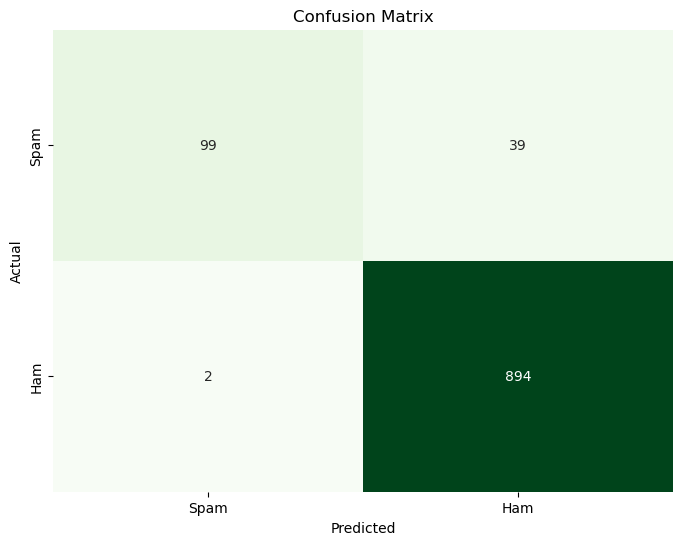

In [23]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Classification report
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       0.98      0.72      0.83       138
         Ham       0.96      1.00      0.98       896

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [25]:
# Train SVM model
svm_model = SVC()
svm_model.fit(X_train_features, y_train)


SVC()

In [26]:
# Evaluate SVM model
svm_prediction_on_test_data = svm_model.predict(X_test_features)
svm_accuracy_on_test_data = accuracy_score(y_test, svm_prediction_on_test_data)
print('SVM - Accuracy on test data: {} %'.format(svm_accuracy_on_test_data * 100))


SVM - Accuracy on test data: 97.48549323017409 %


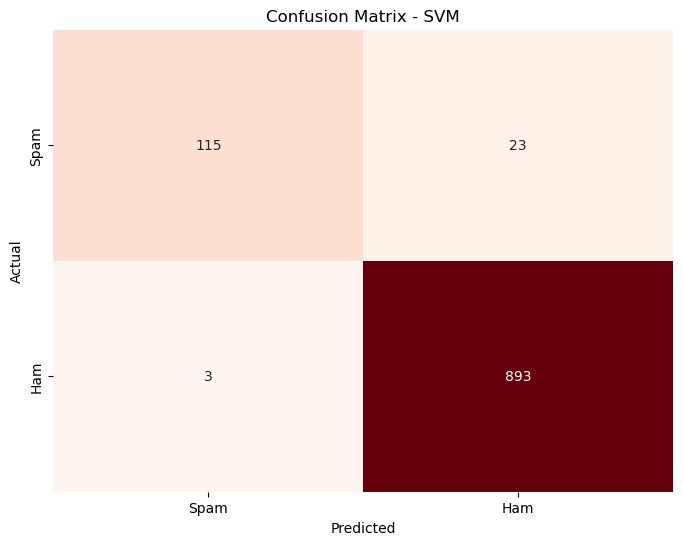

In [27]:
# Confusion Matrix Visualization for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()

In [28]:
# Classification report for SVM
svm_classification_rep = classification_report(y_test, svm_prediction_on_test_data, target_names=['Spam', 'Ham'])
print("SVM - Classification Report:")
print(svm_classification_rep)

SVM - Classification Report:
              precision    recall  f1-score   support

        Spam       0.97      0.83      0.90       138
         Ham       0.97      1.00      0.99       896

    accuracy                           0.97      1034
   macro avg       0.97      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [29]:
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_features, y_train)

RandomForestClassifier()

In [30]:
# Evaluate Random Forest model
rf_prediction_on_test_data = rf_model.predict(X_test_features)
rf_accuracy_on_test_data = accuracy_score(y_test, rf_prediction_on_test_data)
print('Random Forest - Accuracy on test data: {} %'.format(rf_accuracy_on_test_data * 100))

Random Forest - Accuracy on test data: 97.29206963249516 %


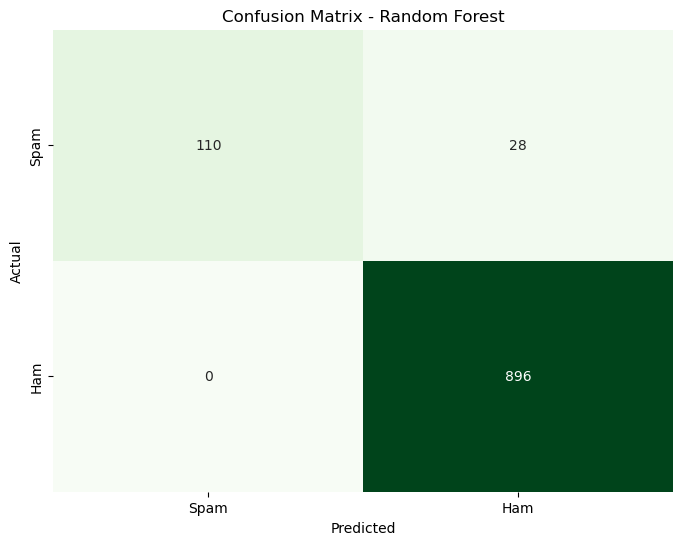

In [31]:
# Confusion Matrix Visualization for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [32]:
# Classification report for Random Forest
rf_classification_rep = classification_report(y_test, rf_prediction_on_test_data, target_names=['Spam', 'Ham'])
print("Random Forest - Classification Report:")
print(rf_classification_rep)

Random Forest - Classification Report:
              precision    recall  f1-score   support

        Spam       1.00      0.80      0.89       138
         Ham       0.97      1.00      0.98       896

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



Text(0.5, 0, 'Models')

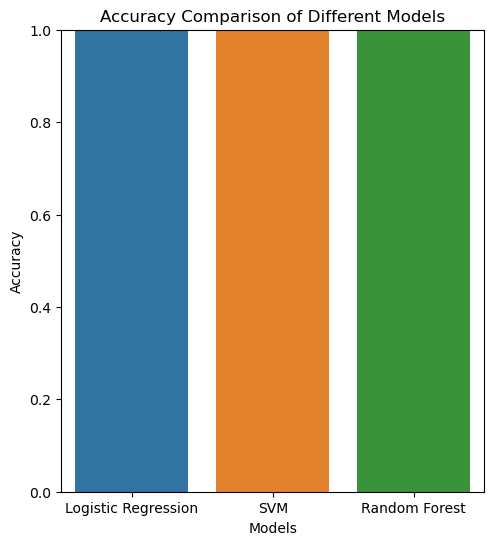

In [34]:
# Bar plot for Accuracy
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [96.03,97.485, 97.29]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=models, y=accuracies)
plt.ylim(0, 1)
plt.title('Accuracy Comparison of Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Models')